In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
path = r'D:\Technocolab\Final Project\Data'

In [3]:
df = pd.read_csv(os.path.join(path, 'cleaned.csv'),  index_col=None)

In [4]:
df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


# Pairwise relationships between continuous variables

In [5]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='binary')

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


### Dancebility and Valence are correlated maximum in this dataset

In [6]:
X = df.drop(['track_id', 'genre_top'], axis=1)
y = df.genre_top

# Normalizing the feature data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis on our scaled data


In [8]:
pca = PCA()
pca.fit(X_scaled)
variances = pca.explained_variance_ratio_

In [9]:
variances

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

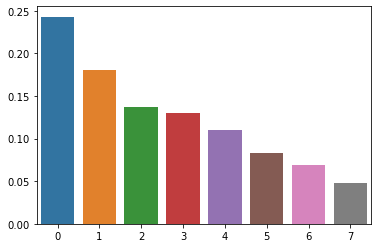

In [10]:
sns.barplot(y=variances, x=list(range(pca.n_components_)))

# Further visualization of PCA

In [11]:
cummilative = np.cumsum(variances)

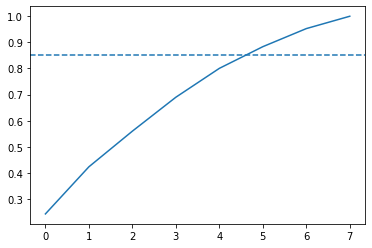

In [12]:
ax = sns.lineplot(y=cummilative, x=list(range(pca.n_components_)));
ax.axhline(y=0.85, linestyle='--')

In [13]:
choosen_n = 6
pca = PCA(choosen_n, random_state=42)
pca.fit(X_scaled)
pca_projected = pca.transform(X_scaled)

In [14]:
pca_projected.shape

(4802, 6)

In [15]:
y.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

### Imbalanced dataset

# Train a decision tree to classify genre


In [16]:
X_train, X_test, y_train, y_test = train_test_split(pca_projected, y, stratify=y)

In [17]:
DecisionTreeClassifier?

In [18]:
tree = DecisionTreeClassifier(random_state=42)

In [19]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = tree.predict(X_test)

In [21]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.855120732722731

In [22]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[150,  78],
       [ 96, 877]], dtype=int64)

In [23]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.61      0.66      0.63       228
        Rock       0.92      0.90      0.91       973

    accuracy                           0.86      1201
   macro avg       0.76      0.78      0.77      1201
weighted avg       0.86      0.86      0.86      1201



# Compare our decision tree to a logistic regression


In [24]:
log_reg = LogisticRegression(random_state=42)

In [25]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
y_pred_reg = log_reg.predict(X_test)

In [27]:
accuracy_score(y_true=y_test, y_pred=y_pred_reg)

0.8884263114071607

In [28]:
confusion_matrix(y_true=y_test, y_pred=y_pred_reg)

array([[124, 104],
       [ 30, 943]], dtype=int64)

In [29]:
print(classification_report(y_true=y_test, y_pred=y_pred_reg))

              precision    recall  f1-score   support

     Hip-Hop       0.81      0.54      0.65       228
        Rock       0.90      0.97      0.93       973

    accuracy                           0.89      1201
   macro avg       0.85      0.76      0.79      1201
weighted avg       0.88      0.89      0.88      1201



# Balance our data for greater performance

In [30]:
rock = df[df.genre_top=='Rock']

In [31]:
hop = df[df.genre_top=='Hip-Hop']

In [32]:
hop.sample(n=900)

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
4034,11817,Hip-Hop,0.799497,0.707462,0.723358,2.764246e-03,0.120899,0.269872,67.308,0.412247
4775,100477,Hip-Hop,0.297228,0.851686,0.838881,8.697000e-07,0.208469,0.242262,95.978,0.515021
4488,32501,Hip-Hop,0.889091,0.566274,0.317302,4.010000e-08,0.082946,0.603448,86.941,0.809695
4762,95908,Hip-Hop,0.313553,0.614370,0.969551,1.438000e-07,0.372578,0.495119,128.855,0.391365
4610,40527,Hip-Hop,0.419791,0.533791,0.780637,7.860200e-01,0.091891,0.053786,206.063,0.235292
...,...,...,...,...,...,...,...,...,...,...
4260,17488,Hip-Hop,0.004697,0.842769,0.226483,8.780805e-01,0.555540,0.045291,89.980,0.774184
4503,32667,Hip-Hop,0.119265,0.744228,0.929076,9.045006e-01,0.094322,0.594945,224.110,0.057892
4532,33552,Hip-Hop,0.025787,0.704017,0.461508,1.315000e-07,0.096519,0.090768,89.170,0.533853
4274,18078,Hip-Hop,0.835353,0.507593,0.740107,8.264280e-05,0.110706,0.255984,84.759,0.690136


In [33]:
sampled_data_set = pd.concat([rock.sample(n=900), hop.sample(n=900)], axis=0)

In [34]:
sampled_data_set.genre_top.value_counts()

Rock       900
Hip-Hop    900
Name: genre_top, dtype: int64

# Does balancing our dataset improve model bias?


In [35]:
scaler_new = StandardScaler()
X_new = sampled_data_set.drop(['track_id', 'genre_top'], axis=1)
y_new = sampled_data_set.genre_top

In [36]:
X_new_scaled = scaler_new.fit_transform(X_new)

In [37]:
pca_new = PCA(choosen_n, random_state=42)

In [38]:
pca_new.fit(X_new_scaled)

PCA(n_components=6, random_state=42)

In [39]:
pca_projected_new = pca_new.fit_transform(X_new_scaled)

In [40]:
pca_projected_new.shape

(1800, 6)

In [41]:
y_new.shape

(1800,)

In [42]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(pca_projected_new, y_new, stratify=y_new)

In [43]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((1350, 6), (450, 6), (1350,), (450,))

In [44]:
tree_new = DecisionTreeClassifier(random_state=42)
log_reg_new = LogisticRegression(random_state=42)

In [45]:
tree_new.fit(X_train_new, y_train_new)
log_reg_new.fit(X_train_new, y_train_new)

LogisticRegression(random_state=42)

In [46]:
y_pred_tree_new = tree_new.predict(X_test_new)
y_pred_log_new = log_reg_new.predict(X_test_new)

In [47]:
print('Tree accuracy: ', accuracy_score(y_true=y_test_new, y_pred=y_pred_tree_new))

Tree accuracy:  0.7577777777777778


In [48]:
print('Logistics Regression accuracy: ', accuracy_score(y_true=y_test_new, y_pred=y_pred_log_new))

Logistics Regression accuracy:  0.7933333333333333


In [49]:
print("Decision Tree: \n", classification_report(y_true=y_test_new, y_pred=y_pred_tree_new))
print("Logistic Regression: \n", classification_report(y_true=y_test_new, y_pred=y_pred_log_new))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.76      0.76       225
        Rock       0.76      0.76      0.76       225

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.83      0.80       225
        Rock       0.81      0.76      0.79       225

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



# Using cross-validation to evaluate our models


In [50]:
kf = KFold(n_splits=30, random_state=42, shuffle=True)

In [51]:
tree_kf = DecisionTreeClassifier(random_state=42)
log_reg_kf = LogisticRegression(random_state=42)

In [52]:
tree_score = cross_val_score(tree_kf, pca_projected, y, cv = kf)
log_reg_score = cross_val_score(log_reg_kf, pca_projected, y, cv = kf)

print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(log_reg_score))

Decision Tree: 0.8602562111801241 Logistic Regression: 0.8775478778467909


# Without PCA

In [71]:
log_reg = LogisticRegression(random_state=42)

In [72]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
y_pred_simple = log_reg.predict(X_test)

In [75]:
accuracy_score(y_pred=y_pred_simple, y_true=y_test)

0.8884263114071607

In [76]:
confusion_matrix(y_pred=y_pred_simple, y_true=y_test)

array([[124, 104],
       [ 30, 943]], dtype=int64)

In [77]:
print(classification_report(y_pred=y_pred_simple, y_true=y_test))

              precision    recall  f1-score   support

     Hip-Hop       0.81      0.54      0.65       228
        Rock       0.90      0.97      0.93       973

    accuracy                           0.89      1201
   macro avg       0.85      0.76      0.79      1201
weighted avg       0.88      0.89      0.88      1201



In [80]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(log_reg, file)